## 1.DOWNLOAD THE DATASET

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.IMAGE AUGUMENTATION

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/drive/MyDrive/flowers"

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [17]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 4381 images belonging to 4 classes.


In [18]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("vertical",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

##3.CREATING THE MODEL


In [19]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

In [22]:
training_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=57,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4381 files belonging to 4 classes.
Using 3505 files for training.


In [23]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
seed=107,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4381 files belonging to 4 classes.
Using 876 files for validation.


In [24]:
training_ds.class_names

['dandelion', 'rose', 'sunflower', 'tulip']

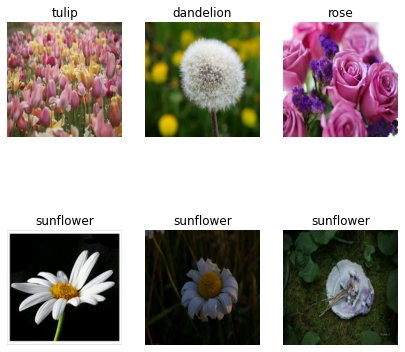

In [25]:
plt.figure(figsize=(7, 7))
for data, labels in training_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(data[i].numpy().astype("uint8"))
    plt.title(training_ds.class_names[labels[i]])
    plt.axis("off")

In [26]:
# Convolution layer 
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))
# Maxpooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
# Flatten
model.add(Flatten())
# Hidden/dense layers
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu"))
# Output layer
model.add(Dense(5, activation = "softmax"))

## 5.COMPILING MODEL

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## 6.SAVE THE MODEL

In [34]:
model.save("flowers.h1")

##7. Test The Model

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [38]:
model = load_model("/content/flowers.h1")
daisy_img = image.load_img('/content/drive/MyDrive/flowers/rose/12240303_80d87f77a3_n.jpg',target_size=(64,64))
x = image.img_to_array(daisy_img)
x = np.expand_dims(x,axis=0)
predicted_class=model.predict(x)

1/1 [==============================] - 0s 124ms/step


In [39]:
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(predicted_class)]

'daisy'

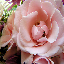

In [42]:
daisy_img